In [1]:
# AnomalyDetection

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import ipaddress



In [2]:
df_ueba = pd.read_csv('F:/Projects/CyberSec/Anomaly_Detection/dataset/dataset.csv')
df_ueba.describe(include='all')

,Username,HostIP,RemoteIP,RemotePort,Date/Time,HostLocation,RemoteIPLocation,ProcessImage
count,81,81,81,81.000000,81,81,81,81
unique,1,2,18,NaN,81,1,5,7
top,John.Doe,192.168.1.2,75.63.15.74,NaN,23.12.2023 08:10:00,USA,USA,HTTP_Client.exe
freq,81,46,8,NaN,1,81,71,58
mean,NaN,NaN,NaN,1587.691358,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2841.218707,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,465.000000,NaN,NaN,NaN,NaN


In [3]:
def iptointeger(ip):
  return int(ipaddress.ip_address(ip))

ueba_features = pd.DataFrame()

ueba_features['HostIP'] = df_ueba['HostIP'].apply(iptointeger)

ueba_features['RemoteIP'] = df_ueba['RemoteIP'].apply(iptointeger)

df_ueba["RemotePort"].value_counts().sort_index()


RemotePort
22       7
80      40
389      1
443      7
464      4
465      2
636      2
3389     5
5938     2
8080    11
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

remoteport_encoded = encoder.fit_transform(df_ueba[['RemotePort', 'HostLocation', 'RemoteIPLocation', 'ProcessImage']])

ueba_features[remoteport_encoded.columns] = remoteport_encoded

min_max_scaler = MinMaxScaler()

ueba_features_scaled = min_max_scaler.fit_transform(ueba_features)


        HostIP    RemoteIP  RemotePort_22  RemotePort_80  RemotePort_389  \
6   3232235778   167772679            0.0            0.0             0.0   
7   3232235778   167772679            0.0            0.0             0.0   
23  3232235778   201357573            0.0            0.0             0.0   
25  3232235778  3861584680            0.0            0.0             0.0   

    RemotePort_443  RemotePort_464  RemotePort_465  RemotePort_636  \
6              0.0             0.0             1.0             0.0   
7              0.0             0.0             1.0             0.0   
23             0.0             0.0             0.0             0.0   
25             0.0             0.0             0.0             0.0   

    RemotePort_3389  ...  RemoteIPLocation_USA  ProcessImage_HTTP_Client.exe  \
6               0.0  ...                   0.0                           0.0   
7               0.0  ...                   0.0                           0.0   
23              0.0  ...    

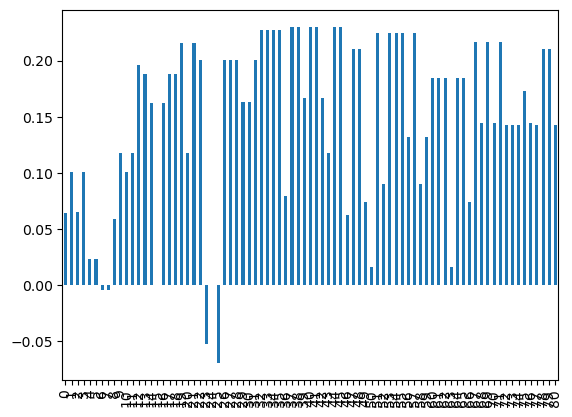

In [5]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

isolationforest = IsolationForest(n_estimators=100, contamination=0.05)

anomaly_labels = isolationforest.fit_predict(ueba_features_scaled)

anomaly_scores = isolationforest.decision_function(ueba_features_scaled)

ueba_features['anomaly_labels'] = anomaly_labels

ueba_features['anomaly_scores'] = anomaly_scores

print(ueba_features[ueba_features['anomaly_labels']==-1])

ueba_features[ueba_features['anomaly_labels']==-1][['HostLocation_USA', 'RemoteIPLocation_China', 'RemoteIPLocation_France', 'RemoteIPLocation_Portugal', 'RemoteIPLocation_UK', 'RemoteIPLocation_USA', 'anomaly_labels', 'anomaly_scores']]

ueba_features['anomaly_scores'].plot(kind='bar')

print(ueba_features[ueba_features['anomaly_labels']==-1])